In [2]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
# This makes the plots appear inside the notebook
%matplotlib inline

0.01
6.28318530718


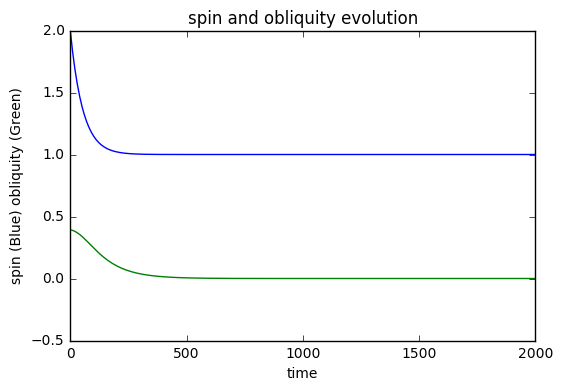

In [3]:
def N(e):
    return (1+(15./2.)*e**2+(45./8.)*e**4+(5./16.)*e**6)/((1-e**2)**6)

def Om(e):
    return (1.+3.*e**2+(3./8.)*e**4)/((1-e**2)**(9./2.))

def dEdt(ecc,obl):
    Nae=(1+(31./2.)*ecc**2+(255./8.)*ecc**4+(185./16.)*ecc**6+(25./64.)*ecc**8)/((1-e**2)**(15./2.))
    return 2*(Nae-(N(ecc)**2/Om(ecc))*(2*(np.cos(obl)**2/(1+np.cos(obl)**2))))

def dU_dt(U,t):
    ome=U[0]
    eps=U[1]
    dodt=-KCN*((1+np.cos(eps)**2)*Om(e)*ome/n - 2*np.cos(eps)*N(e))
    dedt=np.sin(eps)*(KCN/ome)*(np.cos(eps)*Om(e)*ome/n-2*N(e))
    return dodt, dedt


k2=0.3
C=2./5.
G=6.67e-8
Q=1.e+4
Mp=6.0e+28
Rp=2.4e+9
Mstar=2.0e+33
a=0.225e+13
n=np.sqrt(G*Mstar/a**3)
e=0.00015
    
K=1.5*(k2/Q)*(G*Mp**2/Rp)*((Mstar/Mp)**2)*((Rp/a)**6)*n
KCN=K/(C*n)

#scaled values
e=0.0
n=1.
KCN=.01

print KCN
print 2*np.pi/n

U0 = [2.*n, np.pi/8]
ts = np.linspace(0, 2000, 200)
Us = odeint(dU_dt, U0, ts)
omegas = Us[:,0]
epsils = Us[:,1]


plt.xlabel("time")
plt.ylabel("spin (Blue) obliquity (Green)")
plt.title("spin and obliquity evolution")
plt.ylim(-0.5,2.)
plt.plot(ts,omegas)
plt.plot(ts,epsils)

/Users/Greg/anaconda/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


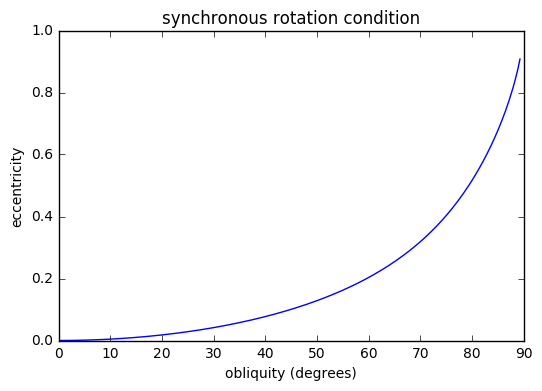

In [4]:
def NdO(e):
    a=((1+(15./2.)*e**2+(45./8.)*e**4+(5./16.)*e**6)/((1-e**2)**6))
    b=((1.+3.*e**2+(3./8.)*e**4)/((1-e**2)**(9./2.)))
    return a/b-rhs
def epF(eps):
    return ((1+np.cos(eps)**2)/(2*np.cos(eps)))

eps=np.linspace(0,(255./512.)*np.pi,255)

x=[]
y=[]
for i in np.arange(len(eps)-1):
    rhs=epF(eps[i])
    x.append(360.*(eps[i]/(2.*np.pi)))
    ecc=fsolve(NdO,0.99)
    y.append(ecc)


plt.plot(x,y)
plt.title("synchronous rotation condition")
plt.xlabel("obliquity (degrees)")
plt.ylabel("eccentricity")



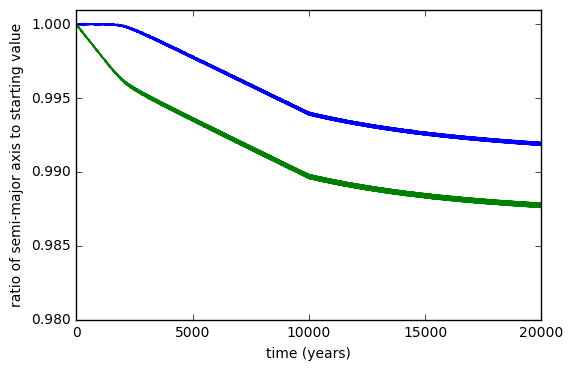

In [5]:
#plot the resonance experiments
f2 = open('../migration/arguments', 'r')
# read the whole file into a single variable, which is a list of every row of the file.
lines = f2.readlines()
f2.close()

# initialize some variable to be lists:
x1 = []
t1 = []
t2 = []
a1 = []
a2 = []
e1 = []
e2 = []
pr = []

# scan the rows of the file stored in lines, and put the values into some variables:
for line in lines:
    p = line.split()
    x1.append(float(p[0]))
    t1.append(float(p[1]))
    t2.append(float(p[2]))
    a1.append(float(p[3]))
    a2.append(float(p[4]))
    e1.append(float(p[5]))
    e2.append(float(p[6]))
    pr.append(float(p[7]))

xv = np.array(x1)
t1v = np.array(t1)
t2v = np.array(t2)
a1v = np.array(a1)
a2v = np.array(a2)
e1v = np.array(e1)
e2v = np.array(e2)
prv = np.array(pr)


# now, plot the data:
#plt.ylim(-180.,180.)
plt.xlim(0.,20000.)
plt.ylim(0.98,1.001)
plt.plot(xv, a1v/a1v[0])
plt.plot(xv, a2v/a2v[0])

plt.xlabel("time (years)")
plt.ylabel("ratio of semi-major axis to starting value")



In [ ]:
plt.xlim(0.,15000.)
plt.plot(xv, a1v)
plt.xlabel("time (years)")
plt.ylabel("semi-major axis (inner)")

In [ ]:
plt.xlim(0.,20000.)
plt.ylim(-180.,180.)
plt.plot(xv, t1v)
plt.xlabel("time (years)")
plt.ylabel("theta_1")


In [ ]:
plt.xlim(0.,20000.)
plt.plot(xv, e1v)
plt.plot(xv, e2v)
plt.xlabel("time (years)")
plt.ylabel("eccentricity inner-blue, outer-green")

In [ ]:
plt.xlim(0.,20000.)
plt.ylim(1.996,2.01)
plt.plot(xv, prv)
plt.xlabel("time (years)")
plt.ylabel("period ratio")

number of overs, mean: 37 0.186 0.0756127131438
number of unders, mean: 38 0.1375 0.0741301109253


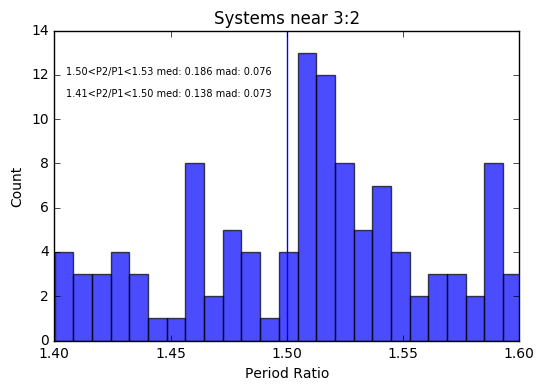

In [6]:
from statsmodels import robust

# Read the file.
f2 = open('planetsQ.csv', 'r')
# read the whole file into a single variable, which is a list of every row of the file.
lines = f2.readlines()
f2.close()

# initialize some variable to be lists:
name = []
period = []
radii = []
ratios =[]
unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
icount=0
# scan the rows of the file stored in lines, and put the values into some variables:
for line in lines:
    p = line.split(",")
    icount=icount+1
    if p[1]==nameOld:
        if float(p[4])/float(p0)<1:
            print icount,nameOld
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.405 and float(p[4])/float(p0) < 1.5:
            unders.append(float(r0))
        if float(p[4])/float(p0)>1.5 and float(p[4])/float(p0) < 1.53:
            overs.append(float(r0))
    name.append(p[1])
    nameOld=p[1]
    p0=p[4]
    r0=p[6]
    period.append(float(p[4]))
    radii.append(float(p[6]))

    
pv = np.array(period)
rv = np.array(radii)

rat=np.array(ratios)
plt.xlim(1.4,1.6)
plt.hist(rat, bins=10000,alpha=0.7)

ovA=np.array(overs)
unA=np.array(unders)

print 'number of overs, mean:', len(overs),np.median(ovA),robust.mad(ovA)
print 'number of unders, mean:', len(unders),np.median(unA),robust.mad(unA)
plt.text(1.405, 12, '1.50<P2/P1<1.53 med: 0.186 mad: 0.076', fontsize=7)
plt.text(1.405, 11, '1.41<P2/P1<1.50 med: 0.138 mad: 0.073', fontsize=7)
plt.xlabel('Period Ratio')
plt.ylabel('Count')
plt.title('Systems near 3:2')
plt.axvline(x=1.5)

# now, plot the data:
#plt.ylim(-180.,180.)
#plt.xlim(0.,1000.)
#plt.scatter(np.log10(pv), rv)
#plt.plot(xv, a2v)

plt.show()

In [ ]:
# Read the file.
f2 = open('planetsQ.csv', 'r')
# read the whole file into a single variable, which is a list of every row of the file.
lines = f2.readlines()
f2.close()

# initialize some variable to be lists:
name = []
period = []
radii = []
ratios =[]
unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
# scan the rows of the file stored in lines, and put the values into some variables:
for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.90 and float(p[4])/float(p0) < 2.0:
            unders.append(float(r0))
        if float(p[4])/float(p0)>2.0 and float(p[4])/float(p0) < 2.07:
            overs.append(float(r0))
    name.append(p[1])
    nameOld=p[1]
    p0=p[4]
    r0=p[6]
    period.append(float(p[4]))
    radii.append(float(p[6]))

    
pv = np.array(period)
rv = np.array(radii)

rat=np.array(ratios)
plt.xlim(1.9,2.1)
plt.hist(rat, bins=10000,alpha=0.7)

ovA=np.array(overs)
unA=np.array(unders)

print 'number of overs, mean:', len(overs),np.median(ovA),robust.mad(ovA)
print 'number of unders, mean:', len(unders),np.median(unA),robust.mad(unA)
plt.text(2.005, 12, '2.00<P2/P1<2.07 med: 0.194 mad: 0.092', fontsize=7)
plt.text(2.005, 11, '1.90<P2/P1<2.00 med: 0.146 mad: 0.054', fontsize=7)
plt.xlabel('Period Ratio')
plt.ylabel('Count')
plt.title('Systems near 2:1')
plt.axvline(x=2.0)

plt.show()

In [ ]:
# Read the file.
f2 = open('planetsQ.csv', 'r')
# read the whole file into a single variable, which is a list of every row of the file.
lines = f2.readlines()
f2.close()

# initialize some variable to be lists:
name = []
period = []
radii = []
ratios =[]
unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
# scan the rows of the file stored in lines, and put the values into some variables:
for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.90 and float(p[4])/float(p0) < 2.0:
            unders.append(float(p[6]))
        if float(p[4])/float(p0)>2.0 and float(p[4])/float(p0) < 2.07:
            overs.append(float(p[6]))
    name.append(p[1])
    nameOld=p[1]
    p0=p[4]
    r0=p[6]
    period.append(float(p[4]))
    radii.append(float(p[6]))

    
pv = np.array(period)
rv = np.array(radii)

rat=np.array(ratios)
plt.xlim(1.9,2.1)
plt.hist(rat, bins=10000,alpha=0.7)

ovA=np.array(overs)
unA=np.array(unders)

print 'number of overs, mean:', len(overs),np.median(ovA),robust.mad(ovA)
print 'number of unders, mean:', len(unders),np.median(unA),robust.mad(unA)
plt.text(2.005,13.2,'Inner pair-member radii:')
plt.text(2.005, 12.6, '2.00<P2/P1<2.07 med: 0.194 mad: 0.092', fontsize=7)
plt.text(2.005, 12.0, '1.90<P2/P1<2.00 med: 0.146 mad: 0.054', fontsize=7)
plt.text(2.005,11.2,'Outer pair-member radii:')
plt.text(2.005, 10.6, '2.00<P2/P1<2.07 med: 0.231 mad: 0.114', fontsize=7)
plt.text(2.005, 10.0, '1.90<P2/P1<2.00 med: 0.185 mad: 0.090', fontsize=7)
plt.xlabel('Period Ratio')
plt.ylabel('Count')
plt.title('Systems near 2:1')
plt.axvline(x=2.0)

plt.show()



In [ ]:
from statsmodels import robust

# Read the file.
f2 = open('planetsQ.csv', 'r')
# read the whole file into a single variable, which is a list of every row of the file.
lines = f2.readlines()
f2.close()

# initialize some variable to be lists:
name = []
period = []
radii = []
ratios =[]
unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
# scan the rows of the file stored in lines, and put the values into some variables:
for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.405 and float(p[4])/float(p0) < 1.5:
            unders.append(float(p[6]))
        if float(p[4])/float(p0)>1.5 and float(p[4])/float(p0) < 1.53:
            overs.append(float(p[6]))
    name.append(p[1])
    nameOld=p[1]
    p0=p[4]
    r0=p[6]
    period.append(float(p[4]))
    radii.append(float(p[6]))

    
pv = np.array(period)
rv = np.array(radii)

rat=np.array(ratios)
plt.xlim(1.4,1.6)
plt.hist(rat, bins=10000,alpha=0.7)

ovA=np.array(overs)
unA=np.array(unders)

print 'number of overs, mean:', len(overs),np.median(ovA),robust.mad(ovA)
print 'number of unders, mean:', len(unders),np.median(unA),robust.mad(unA)
plt.text(1.405,13.2,'Inner pair-member radii:')
plt.text(1.405, 12.6, '1.50<P2/P1<1.53 med: 0.186 mad: 0.076', fontsize=7)
plt.text(1.405, 12.0, '1.41<P2/P1<1.50 med: 0.138 mad: 0.073', fontsize=7)
plt.text(1.405,11.2,'Outer pair-member radii:')
plt.text(1.405, 10.6, '1.50<P2/P1<1.53 med: 0.225 mad: 0.102', fontsize=7)
plt.text(1.405, 10.0, '1.41<P2/P1<1.50 med: 0.139 mad: 0.051', fontsize=7)
plt.xlabel('Period Ratio')
plt.ylabel('Count')
plt.title('Systems near 3:2')
plt.axvline(x=1.5)

# now, plot the data:
#plt.ylim(-180.,180.)
#plt.xlim(0.,1000.)
#plt.scatter(np.log10(pv), rv)
#plt.plot(xv, a2v)

plt.show()

In [ ]:
from statsmodels import robust

#In this segment calculate the overall statistics from both MMR vicinities


f2 = open('planetsQ.csv', 'r')
lines = f2.readlines()
f2.close()

name = []
period = []
radii = []
ratios =[]
unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
# scan the rows of the file stored in lines, and put the values into some variables:
for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.405 and float(p[4])/float(p0) < 1.5:
            unders.append(float(p[6]))
            unders.append(float(r0))
        if float(p[4])/float(p0)>1.5 and float(p[4])/float(p0) < 1.53:
            overs.append(float(p[6]))
            overs.append(float(r0))
    name.append(p[1])
    nameOld=p[1]
    p0=p[4]
    r0=p[6]
    period.append(float(p[4]))
    radii.append(float(p[6]))

for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.90 and float(p[4])/float(p0) < 2.0:
            unders.append(float(p[6]))
            unders.append(float(r0))
        if float(p[4])/float(p0)>2.0 and float(p[4])/float(p0) < 2.07:
            overs.append(float(p[6]))
            overs.append(float(r0))
    name.append(p[1])
    nameOld=p[1]
    period.append(float(p[4]))
    radii.append(float(p[6]))
    p0=p[4]
    r0=p[6]

ovA=np.array(overs)
unA=np.array(unders)

print 'number of overs, mean:', len(overs),np.median(ovA),robust.mad(ovA)
print 'number of unders, mean:', len(unders),np.median(unA),robust.mad(unA)


In [ ]:

f2 = open('planetsQ.csv', 'r')
lines = f2.readlines()
f2.close()

name = []
period = []
radii = []
period1 = []
radii1 = []
period2 = []
radii2 = []
conperiod1 = []
conradii1 = []
conperiod2 = []
conradii2 = []
ratios =[]
unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.405 and float(p[4])/float(p0) < 1.5:
            unders.append(float(p[6]))

            if float(p0)>1.:
                conperiod1.append(float(p0))
                conradii1.append(float(r0))
                conperiod2.append(float(p[4]))
                conradii2.append(float(p[6]))
        if float(p[4])/float(p0)>1.5 and float(p[4])/float(p0) < 1.53:
            overs.append(float(p[6]))
            
            if float(p0)>1.:
                period1.append(float(p0))
                radii1.append(float(r0))
                period2.append(float(p[4]))
                radii2.append(float(p[6]))
    name.append(p[1])
    nameOld=p[1]
    p0=p[4]
    r0=p[6]
#pA=np.array(period)
#rA=np.array(radii)

pA1=np.array(period1)
rA1=np.array(radii1)
pA2=np.array(period2)
rA2=np.array(radii2)

pA=np.concatenate((pA1, pA2), axis=0)
rA=np.concatenate((rA1, rA2), axis=0)

cpA1=np.array(conperiod1)
crA1=np.array(conradii1)
cpA2=np.array(conperiod2)
crA2=np.array(conradii2)

cpA=np.concatenate((cpA1, cpA2), axis=0)
crA=np.concatenate((crA1, crA2), axis=0)

plt.scatter(np.log10(pA), rA,c='g',s=40,alpha=0.7,edgecolors='none')
fit = np.polyfit(np.log10(pA), rA, deg=1)
plt.plot(np.log10(pA), fit[0] * np.log10(pA) + fit[1], color='green')

plt.scatter(np.log10(cpA), crA,s=30,alpha=0.7,c='b',edgecolors='none')
fit = np.polyfit(np.log10(cpA), crA, deg=1)
plt.plot(np.log10(cpA), fit[0] * np.log10(cpA) + fit[1], color='blue')
plt.xlim(0.25,2.5)
plt.ylim(0.,1.)
plt.ylabel('Planetary Radius ($R_{Jup}$)')
plt.xlabel('log10(Period) d')
#plt.scatter(np.log10(pA2),rA2)
#plt.plot(xv, a2v)
plt.text(0.3, 0.9, 'Radii for pairs with $1.50<P2/P1<1.53$',color='green')
plt.text(0.3, 0.85, 'Radii for pairs with $1.41<P2/P1<1.50$',color='blue')
plt.title('Systems near 3:2')
plt.show()
    
#for line in lines:
#    p = line.split()
#    if p[1]==nameOld:
#        ratios.append(float(p[3])/float(p0))
#        if float(p[3])/float(p0)>1.90 and float(p[3])/float(p0) < 2.0:
#            unders.append(float(p[4]))
#            unders.append(float(r0))
#        if float(p[3])/float(p0)>2.0 and float(p[3])/float(p0) < 2.07:
#            overs.append(float(p[4]))
#            overs.append(float(r0))
#    name.append(p[1])
#    nameOld=p[1]
#    period.append(float(p[3]))
#    radii.append(float(p[4]))
#    p0=p[3]
#    r0=p[4]

ovA=np.array(overs)
unA=np.array(unders)

print 'number of overs, mean:', len(overs),np.median(ovA),robust.mad(ovA)
print 'number of unders, mean:', len(unders),np.median(unA),robust.mad(unA)


In [ ]:
f2 = open('planetsQ.csv', 'r')
lines = f2.readlines()
f2.close()

name = []
period = []
radii = []
period1 = []
radii1 = []
period2 = []
radii2 = []
conperiod1 = []
conradii1 = []
conperiod2 = []
conradii2 = []
ratios =[]
unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.9 and float(p[4])/float(p0) < 2.0:
            unders.append(float(p[6]))

            if float(p0)>1.:
                conperiod1.append(float(p0))
                conradii1.append(float(r0))
                conperiod2.append(float(p[4]))
                conradii2.append(float(p[6]))
        if float(p[4])/float(p0)>2.0 and float(p[4])/float(p0) < 2.07:
            overs.append(float(p[6]))
            
            if float(p0)>1.:
                period1.append(float(p0))
                radii1.append(float(r0))
                period2.append(float(p[4]))
                radii2.append(float(p[6]))
    name.append(p[1])
    nameOld=p[1]
    p0=p[4]
    r0=p[6]
#pA=np.array(period)
#rA=np.array(radii)

pA1=np.array(period1)
rA1=np.array(radii1)
pA2=np.array(period2)
rA2=np.array(radii2)

pA=np.concatenate((pA1, pA2), axis=0)
rA=np.concatenate((rA1, rA2), axis=0)

cpA1=np.array(conperiod1)
crA1=np.array(conradii1)
cpA2=np.array(conperiod2)
crA2=np.array(conradii2)

cpA=np.concatenate((cpA1, cpA2), axis=0)
crA=np.concatenate((crA1, crA2), axis=0)

plt.scatter(np.log10(pA), rA,c='g',s=40,alpha=0.7,edgecolors='none')
fit = np.polyfit(np.log10(pA), rA, deg=1)
plt.plot(np.log10(pA), fit[0] * np.log10(pA) + fit[1], color='green')

plt.scatter(np.log10(cpA), crA,s=30,alpha=0.7,c='b',edgecolors='none')
fit = np.polyfit(np.log10(cpA), crA, deg=1)
plt.plot(np.log10(cpA), fit[0] * np.log10(cpA) + fit[1], color='blue')
plt.xlim(0.25,2.5)
plt.ylim(0.,1.)
plt.ylabel('Planetary Radius ($R_{Jup}$)')
plt.xlabel('log10(Period) d')
#plt.scatter(np.log10(pA2),rA2)
#plt.plot(xv, a2v)
plt.text(0.3, 0.75, 'Radii for pairs with $2.00<P2/P1<2.07$',color='green')
plt.text(0.3, 0.7, 'Radii for pairs with $1.90<P2/P1<2.00$',color='blue')
plt.title('Systems near 2:1')
plt.show()
    
#for line in lines:
#    p = line.split()
#    if p[1]==nameOld:
#        ratios.append(float(p[3])/float(p0))
#        if float(p[3])/float(p0)>1.90 and float(p[3])/float(p0) < 2.0:
#            unders.append(float(p[4]))
#            unders.append(float(r0))
#        if float(p[3])/float(p0)>2.0 and float(p[3])/float(p0) < 2.07:
#            overs.append(float(p[4]))
#            overs.append(float(r0))
#    name.append(p[1])
#    nameOld=p[1]
#    period.append(float(p[3]))
#    radii.append(float(p[4]))
#    p0=p[3]
#    r0=p[4]

ovA=np.array(overs)
unA=np.array(unders)

print 'number of overs, mean:', len(overs),np.median(ovA),robust.mad(ovA)
print 'number of unders, mean:', len(unders),np.median(unA),robust.mad(unA)


In [ ]:
f2 = open('planetsQ.csv', 'r')
lines = f2.readlines()
f2.close()

name = []
period = []
radii = []
period1 = []
radii1 = []
period2 = []
radii2 = []
conperiod1 = []
conradii1 = []
conperiod2 = []
conradii2 = []
ratios =[]

ratio=[]
conratio=[]

unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.9 and float(p[4])/float(p0) < 2.0:
            unders.append(float(p[6]))

            if float(p0)>1.:
                conratio.append(float(p[4])/float(p0))
                conradii1.append(float(r0))
                conradii2.append(float(p[6]))
                conperiod1.append(float(p0))
                conperiod2.append(float(p[4]))
                
        if float(p[4])/float(p0)>2.0 and float(p[4])/float(p0) < 2.07:
            overs.append(float(p[6]))
            
            if float(p0)>1.:
                ratio.append(float(p[4])/float(p0))
                radii1.append(float(r0))
                radii2.append(float(p[6]))
                period1.append(float(p0))
                period2.append(float(p[4]))
                
    name.append(p[1])
    nameOld=p[1]
    p0=p[4]
    r0=p[6]
#pA=np.array(period)
#rA=np.array(radii)

pA1=np.array(ratio)
rA1=np.array(radii1)
pA2=np.array(ratio)
rA2=np.array(radii2)

per1=np.array(period1)
per2=np.array(period2)

pA=np.concatenate((pA1, pA2), axis=0)
rA=np.concatenate((rA1, rA2), axis=0)
per=np.concatenate((per1, per2), axis=0)

cpA1=np.array(conratio)
crA1=np.array(conradii1)
cpA2=np.array(conratio)
crA2=np.array(conradii2)

conper1=np.array(conperiod1)
conper2=np.array(conperiod2)

cpA=np.concatenate((cpA1, cpA2), axis=0)
crA=np.concatenate((crA1, crA2), axis=0)
conper=np.concatenate((conper1, conper2), axis=0)

plt.scatter(pA, rA,c=np.log10(per),s=40,edgecolors='none',cmap='viridis')
#fit = np.polyfit(pA, rA, deg=1)
#plt.plot(pA, fit[0] * pA + fit[1], color='green')

plt.scatter(cpA, crA,c=np.log10(conper),s=30,edgecolors='none',cmap='viridis')
#fit = np.polyfit(np.log10(cpA), crA, deg=1)
#plt.plot(np.log10(cpA), fit[0] * np.log10(cpA) + fit[1], color='blue')
plt.xlim(1.9,2.07)
plt.ylim(0.,1.)
plt.ylabel('Planetary Radius ($R_{Jup}$)')
plt.xlabel('$\Delta$')
#plt.scatter(np.log10(pA2),rA2)
#plt.plot(xv, a2v)
#plt.text(0.3, 0.75, 'Radii for pairs with $2.00<P2/P1<2.07$',color='green')
#plt.text(0.3, 0.7, 'Radii for pairs with $1.90<P2/P1<2.00$',color='blue')
plt.title('Systems near 2:1')
plt.colorbar()
plt.axvline(x=2.0)
plt.show()
    
#for line in lines:
#    p = line.split()
#    if p[1]==nameOld:
#        ratios.append(float(p[3])/float(p0))
#        if float(p[3])/float(p0)>1.90 and float(p[3])/float(p0) < 2.0:
#            unders.append(float(p[4]))
#            unders.append(float(r0))
#        if float(p[3])/float(p0)>2.0 and float(p[3])/float(p0) < 2.07:
#            overs.append(float(p[4]))
#            overs.append(float(r0))
#    name.append(p[1])
#    nameOld=p[1]
#    period.append(float(p[3]))
#    radii.append(float(p[4]))
#    p0=p[3]
#    r0=p[4]

ovA=np.array(overs)
unA=np.array(unders)

print 'number of overs, mean:', len(overs),np.median(ovA),robust.mad(ovA)
print 'number of unders, mean:', len(unders),np.median(unA),robust.mad(unA)


In [ ]:
f2 = open('planetsQ.csv', 'r')
lines = f2.readlines()
f2.close()

name = []
period = []
radii = []
period1 = []
radii1 = []
period2 = []
radii2 = []
conperiod1 = []
conradii1 = []
conperiod2 = []
conradii2 = []
ratios =[]

ratio=[]
conratio=[]

unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.41 and float(p[4])/float(p0) < 1.5:
            unders.append(float(p[6]))

            if float(p0)>1.:
                conratio.append(float(p[4])/float(p0))
                conradii1.append(float(r0))
                conradii2.append(float(p[6]))
                conperiod1.append(float(p0))
                conperiod2.append(float(p[4]))
                
        if float(p[4])/float(p0)>1.5 and float(p[4])/float(p0) < 1.53:
            overs.append(float(p[6]))
            
            if float(p0)>1.:
                ratio.append(float(p[4])/float(p0))
                radii1.append(float(r0))
                radii2.append(float(p[6]))
                period1.append(float(p0))
                period2.append(float(p[4]))
                
    name.append(p[1])
    nameOld=p[1]
    p0=p[4]
    r0=p[6]
#pA=np.array(period)
#rA=np.array(radii)

pA1=np.array(ratio)
rA1=np.array(radii1)
pA2=np.array(ratio)
rA2=np.array(radii2)

per1=np.array(period1)
per2=np.array(period2)

pA=np.concatenate((pA1, pA2), axis=0)
rA=np.concatenate((rA1, rA2), axis=0)
per=np.concatenate((per1, per2), axis=0)

cpA1=np.array(conratio)
crA1=np.array(conradii1)
cpA2=np.array(conratio)
crA2=np.array(conradii2)

conper1=np.array(conperiod1)
conper2=np.array(conperiod2)

cpA=np.concatenate((cpA1, cpA2), axis=0)
crA=np.concatenate((crA1, crA2), axis=0)
conper=np.concatenate((conper1, conper2), axis=0)

plt.scatter(pA, rA,c=np.log10(per),s=40,edgecolors='none',cmap='viridis')
#fit = np.polyfit(pA, rA, deg=1)
#plt.plot(pA, fit[0] * pA + fit[1], color='green')

plt.scatter(cpA, crA,c=np.log10(conper),s=30,edgecolors='none',cmap='viridis')
#fit = np.polyfit(np.log10(cpA), crA, deg=1)
#plt.plot(np.log10(cpA), fit[0] * np.log10(cpA) + fit[1], color='blue')
plt.xlim(1.41,1.53)
plt.ylim(0.,1.)
plt.ylabel('Planetary Radius ($R_{Jup}$)')
plt.xlabel('$\Delta$')
#plt.scatter(np.log10(pA2),rA2)
#plt.plot(xv, a2v)
#plt.text(0.3, 0.75, 'Radii for pairs with $2.00<P2/P1<2.07$',color='green')
#plt.text(0.3, 0.7, 'Radii for pairs with $1.90<P2/P1<2.00$',color='blue')
plt.title('Systems near 3:2')
plt.colorbar()
plt.axvline(x=1.5)
plt.show()
    
#for line in lines:
#    p = line.split()
#    if p[1]==nameOld:
#        ratios.append(float(p[3])/float(p0))
#        if float(p[3])/float(p0)>1.90 and float(p[3])/float(p0) < 2.0:
#            unders.append(float(p[4]))
#            unders.append(float(r0))
#        if float(p[3])/float(p0)>2.0 and float(p[3])/float(p0) < 2.07:
#            overs.append(float(p[4]))
#            overs.append(float(r0))
#    name.append(p[1])
#    nameOld=p[1]
#    period.append(float(p[3]))
#    radii.append(float(p[4]))
#    p0=p[3]
#    r0=p[4]

ovA=np.array(overs)
unA=np.array(unders)

print 'number of overs, mean:', len(overs),np.median(ovA),robust.mad(ovA)
print 'number of unders, mean:', len(unders),np.median(unA),robust.mad(unA)

1.25659859753 3.07261787257
328.96741945 1727.70388543
16.9631967909 92.566869276
3877.19117361 20193.5146009
17416.2969217 92370.5013543
5427.77862486 28219.3189942
12.9552181669 68.074690448
28029.1448817 150447.843814
986.871487008 5079.91515592
3938.31619106 20927.4640378
55696.924435 292400.563949
317.353816964 1699.64337535
12533.3814246 25781.9411422
42432.809055 226708.356122
3.60771149127 12.6151431657
15032.9387665 79215.2615993
10.9894849388 1.05844339342
19941.0944814 124524.689632
1776.94387223 31.4053672486
0.170734008296 0.63420293472
26580.7188946 534.933587218
61270.7563522 322363.26928
8873.27987259 47068.9333961
0.451868827151 1.73517684902
622.555101403 3298.22850849
1547.84782102 8409.30230836
4.01417078919 20.3915373638
23.2572766387 123.668614771
0.488493036013 11.1914716828
9.69397638826 51.8157549144
8778.64170817 12280.3041277
0.071006732837 0.452303594936
13778.3092565 8910.49127439
8.59048922613 121.118727569
521.571665868 4925.28945679
20995.9477485 108527.

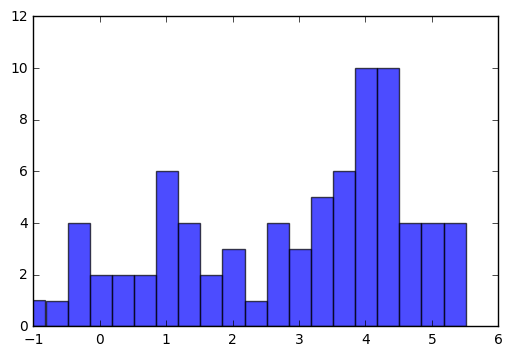

In [29]:
f2 = open('planetsQ.csv', 'r')
lines = f2.readlines()
f2.close()

name = []
period = []
radii = []
period1 = []
radii1 = []
period2 = []
radii2 = []
conperiod1 = []
conradii1 = []
conperiod2 = []
conradii2 = []
ratios =[]
q1=[]


ratio=[]
conratio=[]

unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
m0=0.
for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.9 and float(p[4])/float(p0) < 2.0:
            unders.append(float(p[6]))

            if float(p0)>1.:
                conratio.append(float(p[4])/float(p0))
                conradii1.append(float(r0))
                conradii2.append(float(p[6]))
                conperiod1.append(float(p0))
                conperiod2.append(float(p[4]))
                
        if float(p[4])/float(p0)>2.0 and float(p[4])/float(p0) < 2.07:
            overs.append(float(p[6]))
            
            if float(p0)>1.:
                if len(p[7])>0:
                    massStar=float(p[7])*2.0e+33
                else:
                    massStar=2.0e+33
                    
                if len(p[8])>1:
                    ageStar=float(p[8])*1.0e+9*3.17e+7
                else:
                    ageStar=5.0e+9*3.17e+7
                    
                mPin=m0
                    
                if len(p[5])>0:
                    mPout=float(p[5])*2.0e+30
                else:
                    mPout=(5./319.)*2.0e+30
                    
                ain=((float(p[4])*86400)**(2./3.))*(6.67e-8*massStar/(4.*np.pi*np.pi))**(1./3.)
                aout=((float(p0)*86400)**(2./3.))*(6.67e-8*massStar/(4.*np.pi*np.pi))**(1./3.)
                
                deltaAin=ain*(1-(2./(float(p[4])/float(p0)))**(2./3.))
                deltaAout=aout*(1-(2./(float(p[4])/float(p0)))**(2./3.))
                
                nin=(2.*np.pi)/(86400.*float(p0))
                nout=(2.*np.pi)/(86400.*float(p[4]))
                
                Qin=nin*ageStar*(ain/deltaAin)*(massStar/mPin)*(r0*7e+9/ain)**5
                Qout=nout*ageStar*(aout/deltaAout)*(massStar/mPout)*(r0*7e+9/aout)**5
                print Qin,Qout
                q1.append(Qin)
                q1.append(Qout)
                ratio.append(float(p[4])/float(p0))
                radii1.append(float(r0))
                radii2.append(float(p[6]))
                period1.append(float(p0))
                period2.append(float(p[4]))
                
    name.append(p[1])
    nameOld=p[1]
    p0=float(p[4])
    r0=float(p[6])
    if len(p[5])>0:
        m0=float(p[5])*2.0e+30
    else:
       
        m0=(5./319.)*2.0e+30



In [33]:
f2 = open('planetsQ.csv', 'r')
lines = f2.readlines()
f2.close()

name = []
period = []
radii = []
period1 = []
radii1 = []
period2 = []
radii2 = []
conperiod1 = []
conradii1 = []
conperiod2 = []
conradii2 = []
ratios =[]
q2=[]


ratio=[]
conratio=[]

unders= []
overs= []

nameOld='initialize'
p0=0.
r0=0.
m0=0.
for line in lines:
    p = line.split(",")
    if p[1]==nameOld:
        ratios.append(float(p[4])/float(p0))
        if float(p[4])/float(p0)>1.405 and float(p[4])/float(p0) < 1.5:
            unders.append(float(p[6]))

            if float(p0)>1.:
                conratio.append(float(p[4])/float(p0))
                conradii1.append(float(r0))
                conradii2.append(float(p[6]))
                conperiod1.append(float(p0))
                conperiod2.append(float(p[4]))
                
        if float(p[4])/float(p0)>1.5 and float(p[4])/float(p0) < 1.53:
            overs.append(float(p[6]))
            
            if float(p0)>1.:
                if len(p[7])>0:
                    massStar=float(p[7])*2.0e+33
                else:
                    massStar=2.0e+33
                    
                if len(p[8])>1:
                    ageStar=float(p[8])*1.0e+9*3.17e+7
                else:
                    ageStar=5.0e+9*3.17e+7
                    
                mPin=m0
                    
                if len(p[5])>0:
                    mPout=float(p[5])*2.0e+30
                else:
                    mPout=(5./319.)*2.0e+30
                    
                ain=((float(p[4])*86400)**(2./3.))*(6.67e-8*massStar/(4.*np.pi*np.pi))**(1./3.)
                aout=((float(p0)*86400)**(2./3.))*(6.67e-8*massStar/(4.*np.pi*np.pi))**(1./3.)
                
                deltaAin=ain*(1-(1.5/(float(p[4])/float(p0)))**(2./3.))
                deltaAout=aout*(1-(1.5/(float(p[4])/float(p0)))**(2./3.))
                
                nin=(2.*np.pi)/(86400.*float(p0))
                nout=(2.*np.pi)/(86400.*float(p[4]))
                
                Qin=nin*ageStar*(ain/deltaAin)*(massStar/mPin)*(r0*7e+9/ain)**5
                Qout=nout*ageStar*(aout/deltaAout)*(massStar/mPout)*(r0*7e+9/aout)**5
                print Qin,Qout
                q2.append(Qin)
                q2.append(Qout)
                ratio.append(float(p[4])/float(p0))
                radii1.append(float(r0))
                radii2.append(float(p[6]))
                period1.append(float(p0))
                period2.append(float(p[4]))
                
    name.append(p[1])
    nameOld=p[1]
    p0=float(p[4])
    r0=float(p[6])
    if len(p[5])>0:
        m0=float(p[5])*2.0e+30
    else:
       
        m0=(5./319.)*2.0e+30



352145.109333 925100.138775
435290.394199 1153227.01805
58111.3414196 156401.990486
19638686.8082 50860666.8671
150.167246393 394.044475089
186184.334936 496655.231601
3.45153116516 8.35625626686
141.032392601 371.653203819
197303.218565 325081.86969
54315.5955933 143365.904613
180.970803812 140.571951213
171.234030281 450.825359062
1499.14716019 3923.53698566
45644.8400468 122349.370505
12.4063608988 33.9020547816
20.7954214974 72.8609922777
3137.54423995 9251.84957294
359200.557638 1634551.35267
852.726284031 2233.75341561
85.9186809731 222.714459192
2573.106876 6633.44340078
12490.9222685 32660.2835851
1427.35386088 3764.89382866
5807.27960197 15433.3312233
19509.4001291 6118.33282754
843.908119052 3027.44273177
12.288761951 17.8482463341
351.828702127 2277.4591263
1.49899751789 5.24897362411
61.1670948402 103.783802964
0.32127485885 1.26725526247
35753.3282291 153373.073493
8049.73907205 12709.2500059
9350.20449082 24326.7066023
125993.388372 216759.28484
22078.7985809 52577.367054

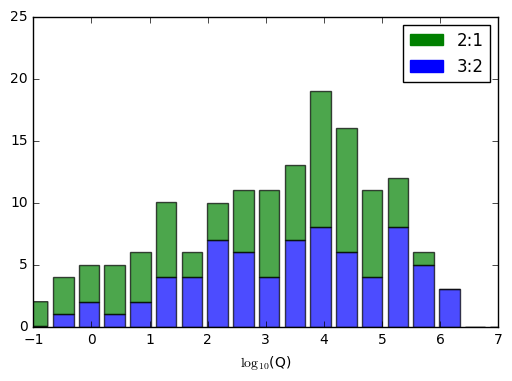

In [38]:
import matplotlib.patches as mpatches
plt.hist([np.log10(q2),np.log10(q1)],stacked=True,bins=20,alpha=0.7)
plt.xlim(-1,7)
plt.ylim(0,25)
green_patch = mpatches.Patch(color='green', label='2:1')
blue_patch = mpatches.Patch(color='blue', label='3:2')
plt.legend(handles=[green_patch, blue_patch])
plt.xlabel('$\log_{10}$(Q)')
plt.show()

184 34


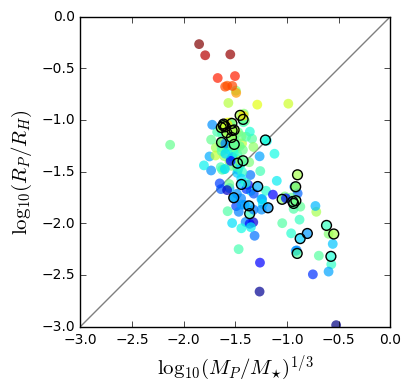

In [108]:
xpoints=[]
ypoints=[]
zpoints=[]
for line in lines:
    p = line.split(",")
    if len(p[6])>1 and len(p[7])>1 and len(p[5])>1 and len(p[4])>1:
        Rp=float(p[6])*7.0e+9
        Ms=float(p[7])*2.0e+33
        Mp=float(p[5])*2.0e+30
        Pp=float(p[4])*86400.
        ap=((6.67e-8*Ms/(4.*np.pi**2))**(1./3.))*(Pp**(2./3.))
        Rh=ap*(Mp/(3.*Ms))**(1./3.)
        xpoints.append((Mp/Ms)**(1./3.))
        ypoints.append(Rp/Rh)
        zpoints.append(Pp)
xp=np.array(xpoints)
yp=np.array(ypoints)
zp=np.array(zpoints)

#############################################
# initialize some variable to be lists:
name = []


xpointsR2o=[]
ypointsR2o=[]
xpointsR2i=[]
ypointsR2i=[]


nameOld='initialize'
p0=0.
r0=0.
m7=0.
m5=0.
icount=0
# scan the rows of the file stored in lines, and put the values into some variables:
for line in lines:
    p = line.split(",")
    icount=icount+1
    if p[1]==nameOld:
        if (float(p[4])/float(p0)>1.5 and float(p[4])/float(p0) < 1.53) or (float(p[4])/float(p0)>2.0 and float(p[4])/float(p0) < 2.07):

                if len(p[6])>1 and len(p[7])>1 and len(p[5])>1 and len(p[4])>1:
                    Rp=float(p[6])*7.0e+9
                    Ms=float(p[7])*2.0e+33
                    Mp=float(p[5])*2.0e+30
                    Pp=float(p[4])*86400.
                    ap=((6.67e-8*Ms/(4.*np.pi**2))**(1./3.))*(Pp**(2./3.))
                    Rh=ap*(Mp/(3.*Ms))**(1./3.)
                    xpointsR2o.append((Mp/Ms)**(1./3.))
                    ypointsR2o.append(Rp/Rh)

                if len(p0)>1 and len(m7)>1 and len(m5)>1 and len(p0)>1:
                    Rp=float(r0)*7.0e+9
                    Ms=float(m7)*2.0e+33
                    Mp=float(m5)*2.0e+30
                    Pp=float(p0)*86400.
                    ap=((6.67e-8*Ms/(4.*np.pi**2))**(1./3.))*(Pp**(2./3.))
                    Rh=ap*(Mp/(3.*Ms))**(1./3.)
                    xpointsR2i.append((Mp/Ms)**(1./3.))
                    ypointsR2i.append(Rp/Rh)
            
    name.append(p[1])
    nameOld=p[1]
    p0=p[4]
    r0=p[6]
    m7=p[7]
    m5=p[5]

    
xpR2 = np.array(xpointsR2i)
ypR2 = np.array(ypointsR2i)
####################################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(np.log10(xp),np.log10(yp),c=np.log10(zp),s=50,lw=0,alpha=0.7,cmap="jet_r")
ax.scatter(np.log10(xpR2),np.log10(ypR2),s=50,facecolors='none', edgecolors='black')
ax.set_xlim(-3.,0.)
ax.set_ylim(-3.,0.)
ax.set_aspect('equal')
ax.set_xlabel('$\log_{10}(M_{P}/M_{\star})^{1/3}$',size=15)
ax.set_ylabel('$\log_{10}(R_{P}/R_{H})$',size=15)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.5, zorder=0)

print len(xp),len(xpR2)